추세파악
수요가 늘면 수요대비
수요가 줄면 서비스개선 새로운 사업계획
계절에 따라 수요에 대한 계획


In [1]:
# Annotated heatmaps

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


df = sns.load_dataset("flights")
df.shape  

(144, 3)

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


Object `barplot` not found.


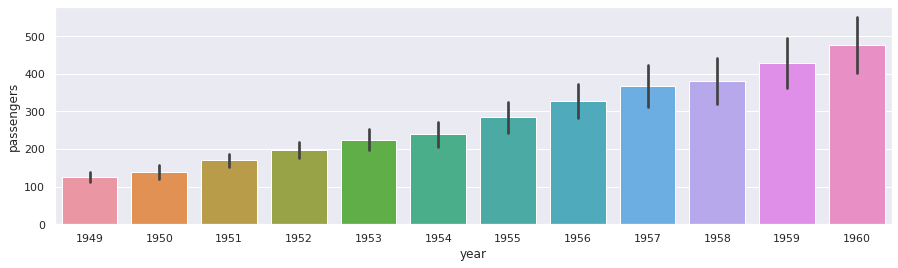

In [10]:
#batplot
plt.figure(figsize=(15,4))
sns.barplot(data=df, x="year", y="passengers", ci="sd") # ci= 표준편차 , 없으면 신뢰구간 95%로그림
barplot?

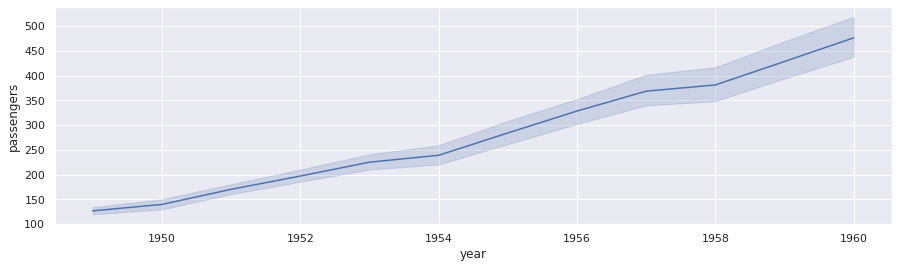

In [11]:
# lineplot

plt.figure(figsize=(15,4))
sns.lineplot(data=df, x="year", y="passengers") # ci= 표준편차 , 없으면 신뢰구간 95%로그림

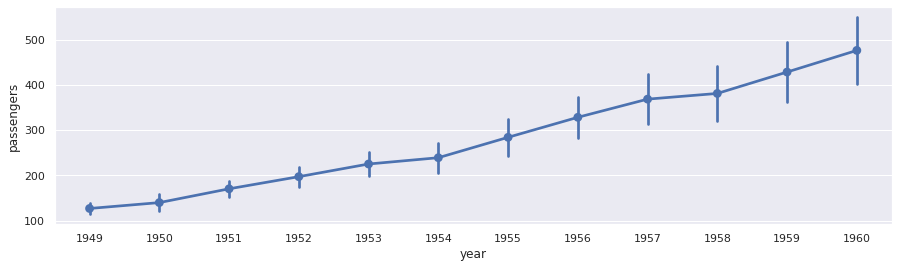

In [13]:
# pointplot
plt.figure(figsize=(15,4))
sns.pointplot(data=df, x="year", y="passengers", ci="sd") # ci= 표준편차 , 없으면 신뢰구간 95%로그림 <= 신뢰구간을 나타냄

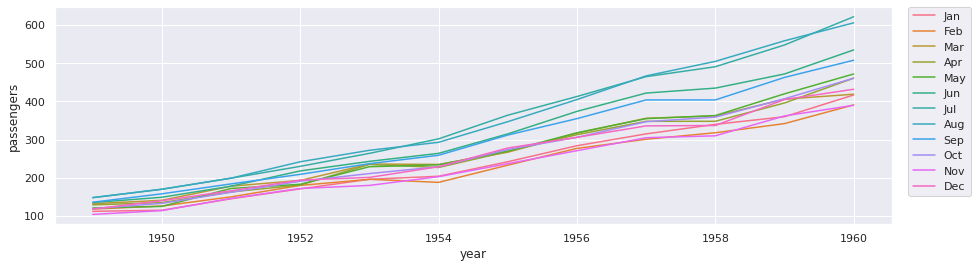

In [15]:
# lineplot에 hue를 통해 month 값에 따라 여러 색으로 나눠 그리기
plt.figure(figsize=(15,4))
sns.lineplot(data=df, x="year", y="passengers", hue="month") 
plt.legend(bbox_to_anchor=(1.02,1), loc=2, borderaxespad=0.)

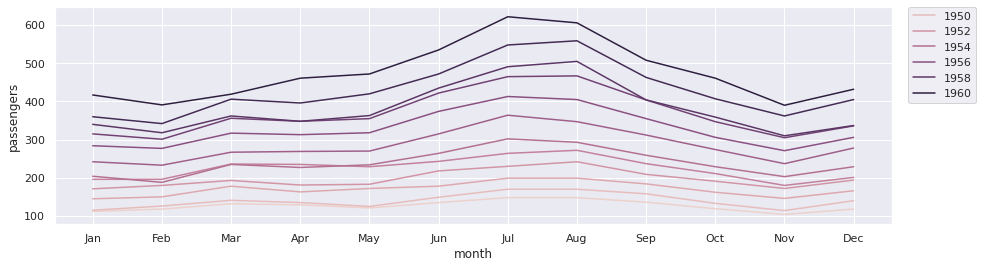

In [16]:
# lineplot에 hue를 통해 month 값에 따라 여러 색으로 나눠 그리기
plt.figure(figsize=(15,4))
sns.lineplot(data=df, x="month", y="passengers", hue="year") 
plt.legend(bbox_to_anchor=(1.02,1), loc=2, borderaxespad=0.)

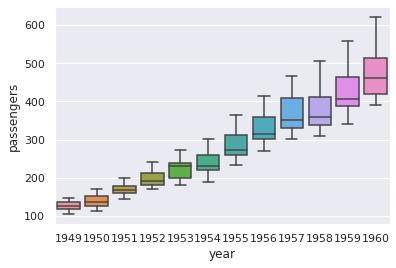

In [20]:
# boxplot
#plt.figure(figsize=(15,4))
sns.boxplot(data=df, x="year", y="passengers")

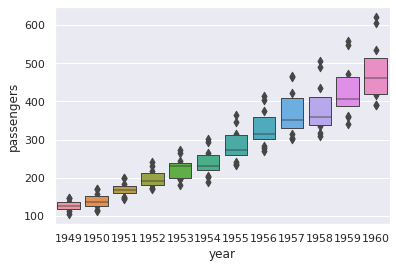

In [21]:
sns.boxenplot(data=df, x="year", y="passengers")

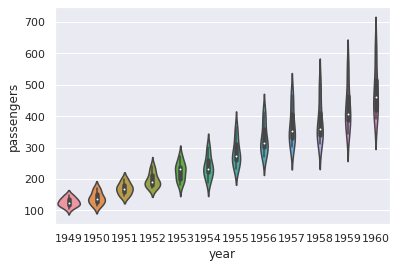

In [22]:
sns.violinplot(data=df, x="year", y="passengers")

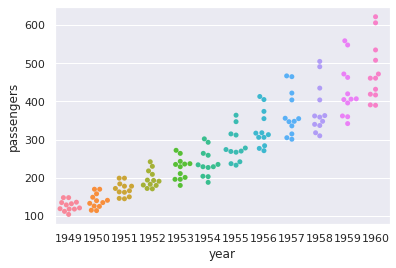

In [23]:
sns.swarmplot(data=df, x="year", y="passengers")

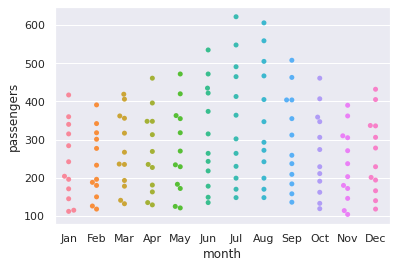

In [24]:
sns.swarmplot(data=df, x="month", y="passengers")

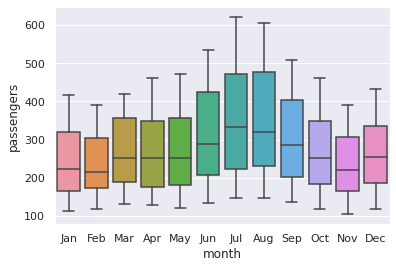

In [25]:
sns.boxplot(data=df, x="month", y="passengers")

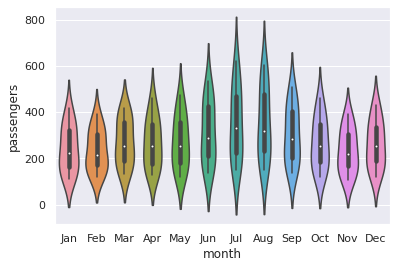

In [26]:
sns.violinplot(data=df, x="month", y="passengers")

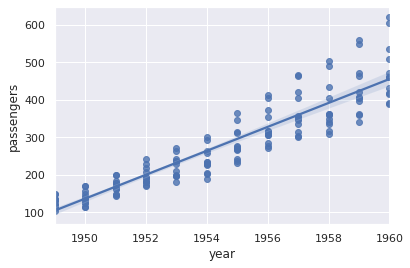

In [27]:
sns.regplot(data=df, x="year", y="passengers")

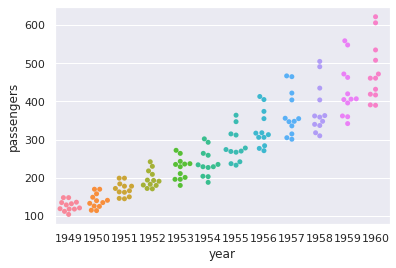

In [29]:
sns.swarmplot(data=df, x="year", y="passengers")

pivot으로 데이터 형태 바꾸기

In [34]:
df_h = df.pivot(index="month", columns="year", values="passengers")

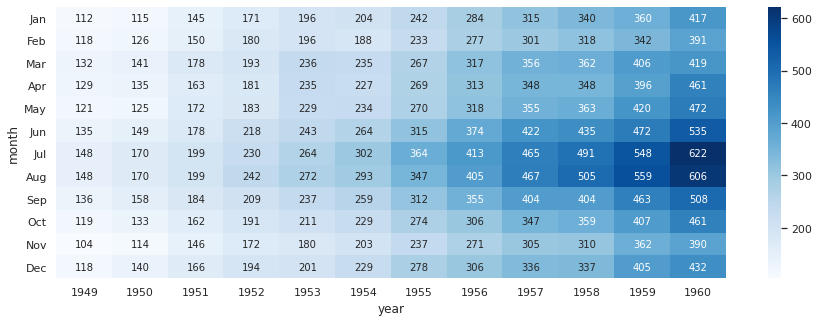

In [37]:
# heatmat
plt.figure(figsize=(15,5))
sns.heatmap(df_h, annot=True, fmt=".0f", cmap="Blues")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


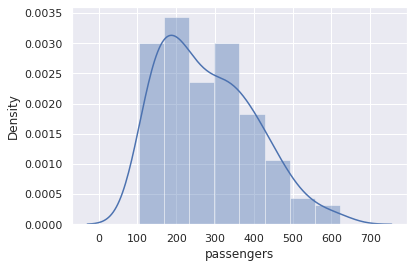

In [39]:
# distplot
sns.distplot(df["passengers"])

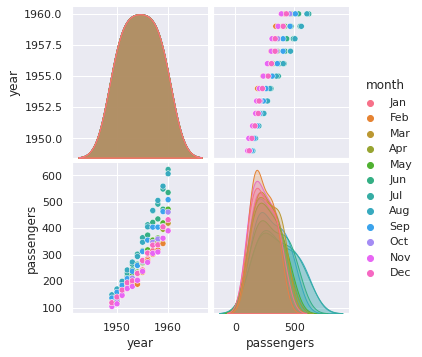

In [41]:
#pairplot
sns.pairplot(data=df, hue="month")

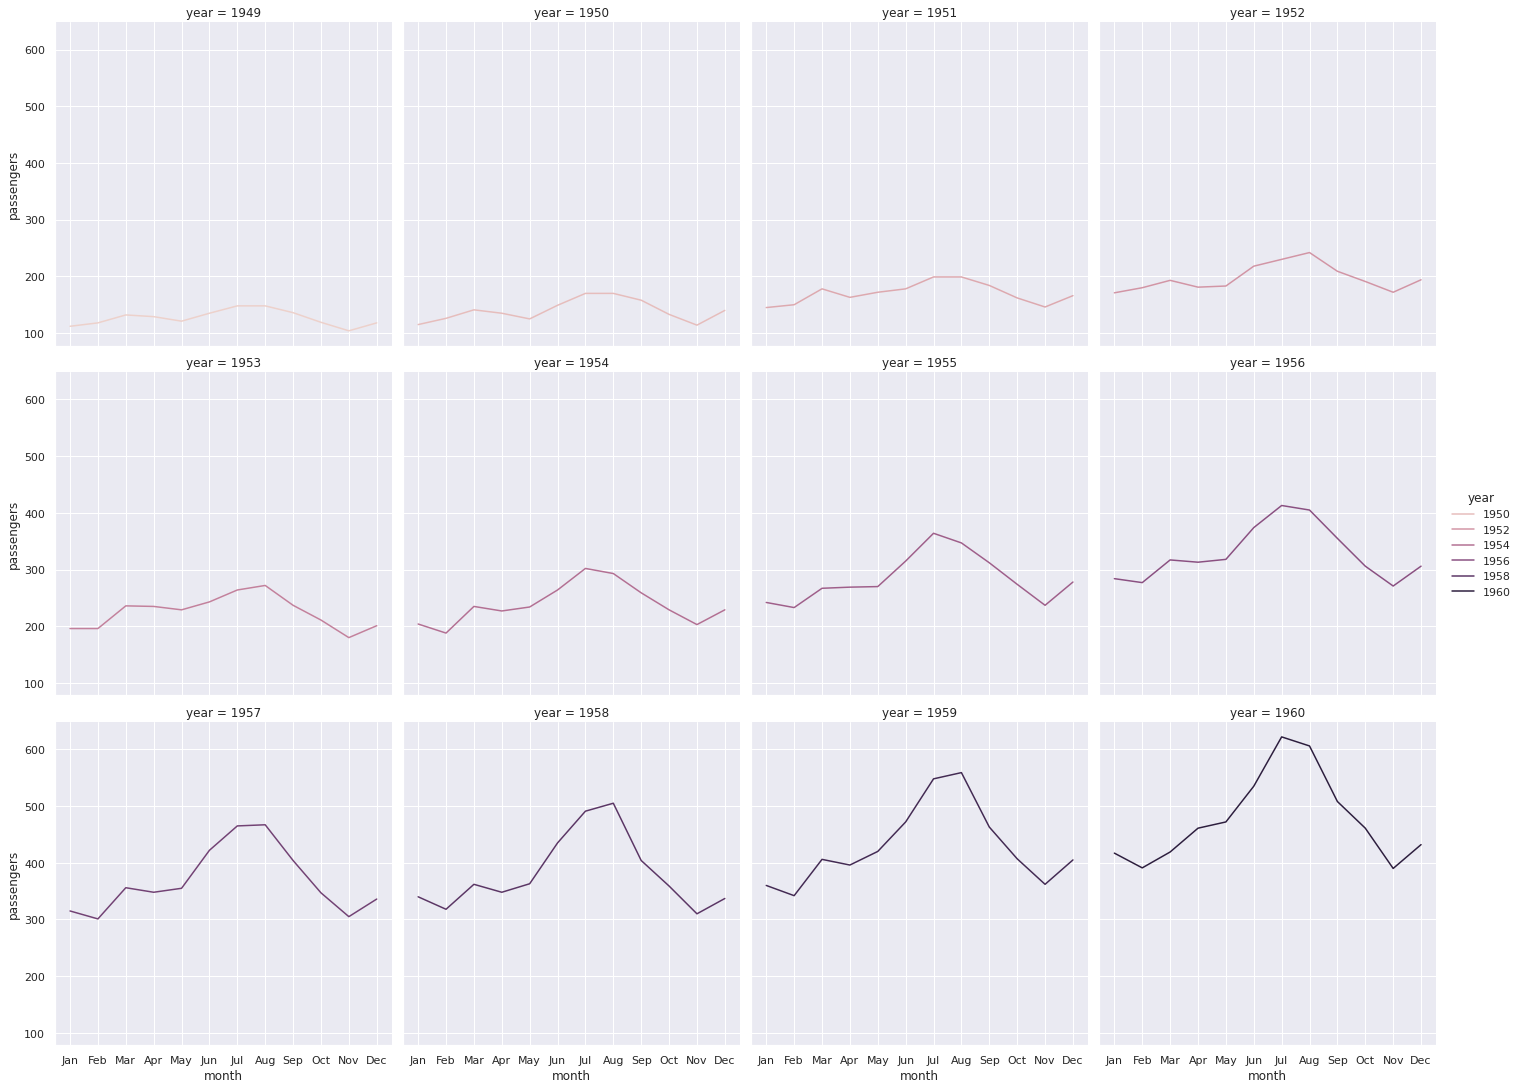

In [46]:
#replot
sns.relplot(data=df, x="month", y="passengers", kind="line", hue="year", col="year", col_wrap=4 )

datetime 형태로 변환해서 보기


In [47]:
from datetime import datetime
year = 2020
month = "March"

s = f"{year} {month} 1"
d = datetime.strptime(s, "%Y %b %d")
d.strftime("%Y-%m-%d")

'2020-03-01'

In [56]:
def fine_datetime(row):
  year = row["year"]
  month = row["month"]

  s = f"{year} {month} 1"
  d = datetime.strptime(s, "%Y %b %d")
  
  return d.strftime("%Y-%m-%d")

In [57]:
row = {"year":1949, "month":"Jan"}
fine_datetime(row)

'1949-01-01'

In [61]:
df["date"] = df.apply(fine_datetime, axis=1) #object 형식

In [63]:
import pandas as pd

df["date"] = pd.to_datetime(df["date"])
df["date"].head(1)

0   1949-01-01
Name: date, dtype: datetime64[ns]

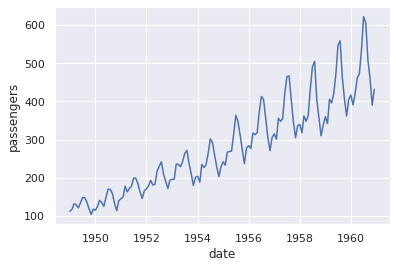

In [68]:

sns.lineplot(data=df, x="date", y="passengers")

 Time Series data Decomposition (시계열 데이터 분해)
 Trend
 Seasonal
 Residual(random, remainder)

 pip install statsmodels (pip사용시)
 conda install -c conda-forge statsmodels (아나콘다사용시)

In [70]:
df_date = df[["date","passengers"]].set_index("date")
df_date.head()

,passengers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Additive Model
값을 더해서 구함
y = Level + Trend + Seasonality + Noise


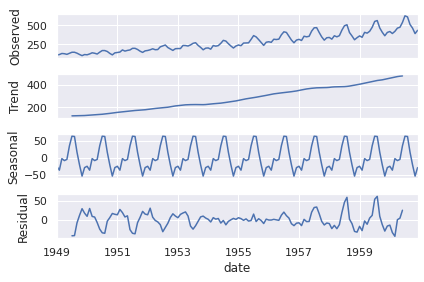

In [71]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(df_date) #model='additive가 기본값
d = decomp.plot()

Multiplicative Model
y = Level x Trend x Seasonality x Noise

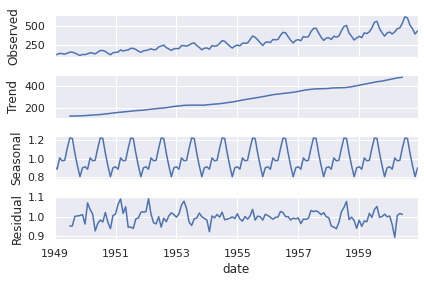

In [73]:
decomp = seasonal_decompose(df_date, model='multiplicative')
d = decomp.plot()